# 📂 Train/Test Data Validation
This notebook checks the integrity and class balance of the training and test datasets. Ensures proper separation, label availability, and distribution health before training.

---

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
from tqdm import tqdm
sns.set(style='whitegrid')

In [2]:
# 📦 Config
NPY_ROOT = Path("../../resources/material/train-data/federated/IID-npy")  # Change as needed
EXPECTED_SHAPE = 4096  # Final shape after flattening
SHOW_PLOTS = True

# 🔎 Utility to flatten file list
def list_npy_files(base_dir):
    return sorted([f for f in base_dir.rglob("*.npy")])

In [3]:
# 🔍 Validate shape and content
file_list = list_npy_files(NPY_ROOT)
print(f"📂 Total .npy files found: {len(file_list)}\n")

bad_shape = []
zero_vectors = []
nan_vectors = []
all_lengths = []

for fpath in tqdm(file_list, desc="Validating files"):
    try:
        vec = np.load(fpath)
        all_lengths.append(vec.shape[0])
        if vec.shape[0] != EXPECTED_SHAPE:
            bad_shape.append(fpath)
        if np.isnan(vec).any():
            nan_vectors.append(fpath)
        if np.allclose(vec, 0):
            zero_vectors.append(fpath)
    except Exception as e:
        print(f"❌ Error reading {fpath}: {e}")

📂 Total .npy files found: 3870



Validating files: 100%|██████████| 3870/3870 [00:03<00:00, 1253.40it/s]


In [4]:
print("\n=== ✅ Summary of Validation ===")
print(f"Bad shape files ({len(bad_shape)}):")
for f in bad_shape[:5]: print(f" - {f}")
print(f"\nFiles with NaNs ({len(nan_vectors)}):")
for f in nan_vectors[:5]: print(f" - {f}")
print(f"\nZero-content files ({len(zero_vectors)}):")
for f in zero_vectors[:5]: print(f" - {f}")


=== ✅ Summary of Validation ===
Bad shape files (0):

Files with NaNs (0):

Zero-content files (0):


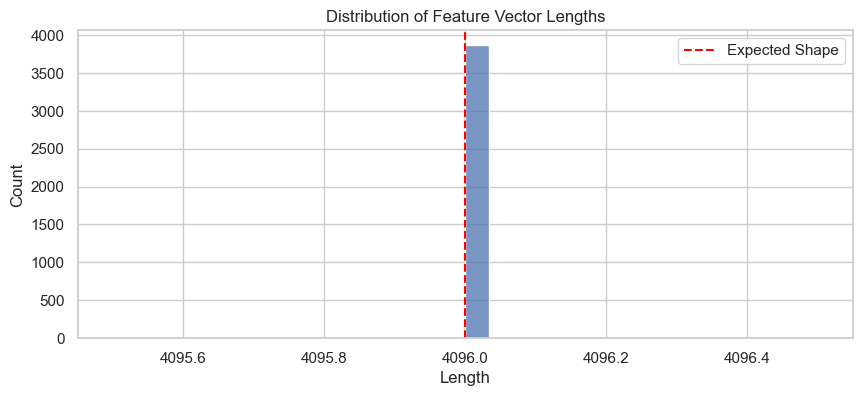

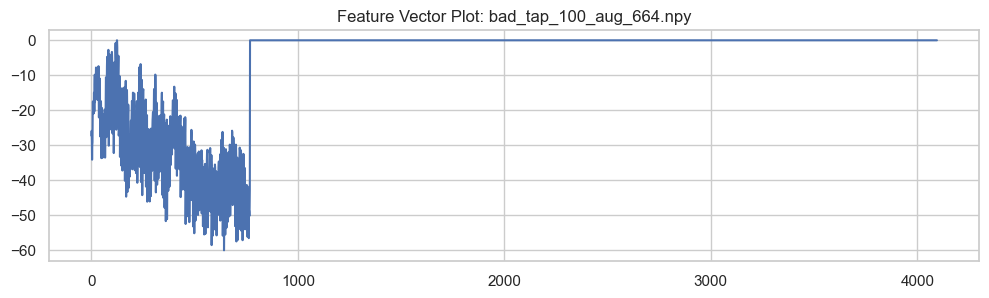

In [5]:
# 🎨 Distribution and example plots
if SHOW_PLOTS:
    plt.figure(figsize=(10, 4))
    sns.histplot(all_lengths, bins=30)
    plt.axvline(EXPECTED_SHAPE, color='red', linestyle='--', label='Expected Shape')
    plt.title("Distribution of Feature Vector Lengths")
    plt.xlabel("Length")
    plt.ylabel("Count")
    plt.legend()
    plt.show()

    # Show random good vector
    good_file = next((f for f in file_list if f not in bad_shape and f not in nan_vectors), None)
    if good_file:
        vec = np.load(good_file)
        plt.figure(figsize=(12, 3))
        plt.plot(vec)
        plt.title(f"Feature Vector Plot: {good_file.name}")
        plt.grid(True)
        plt.show()

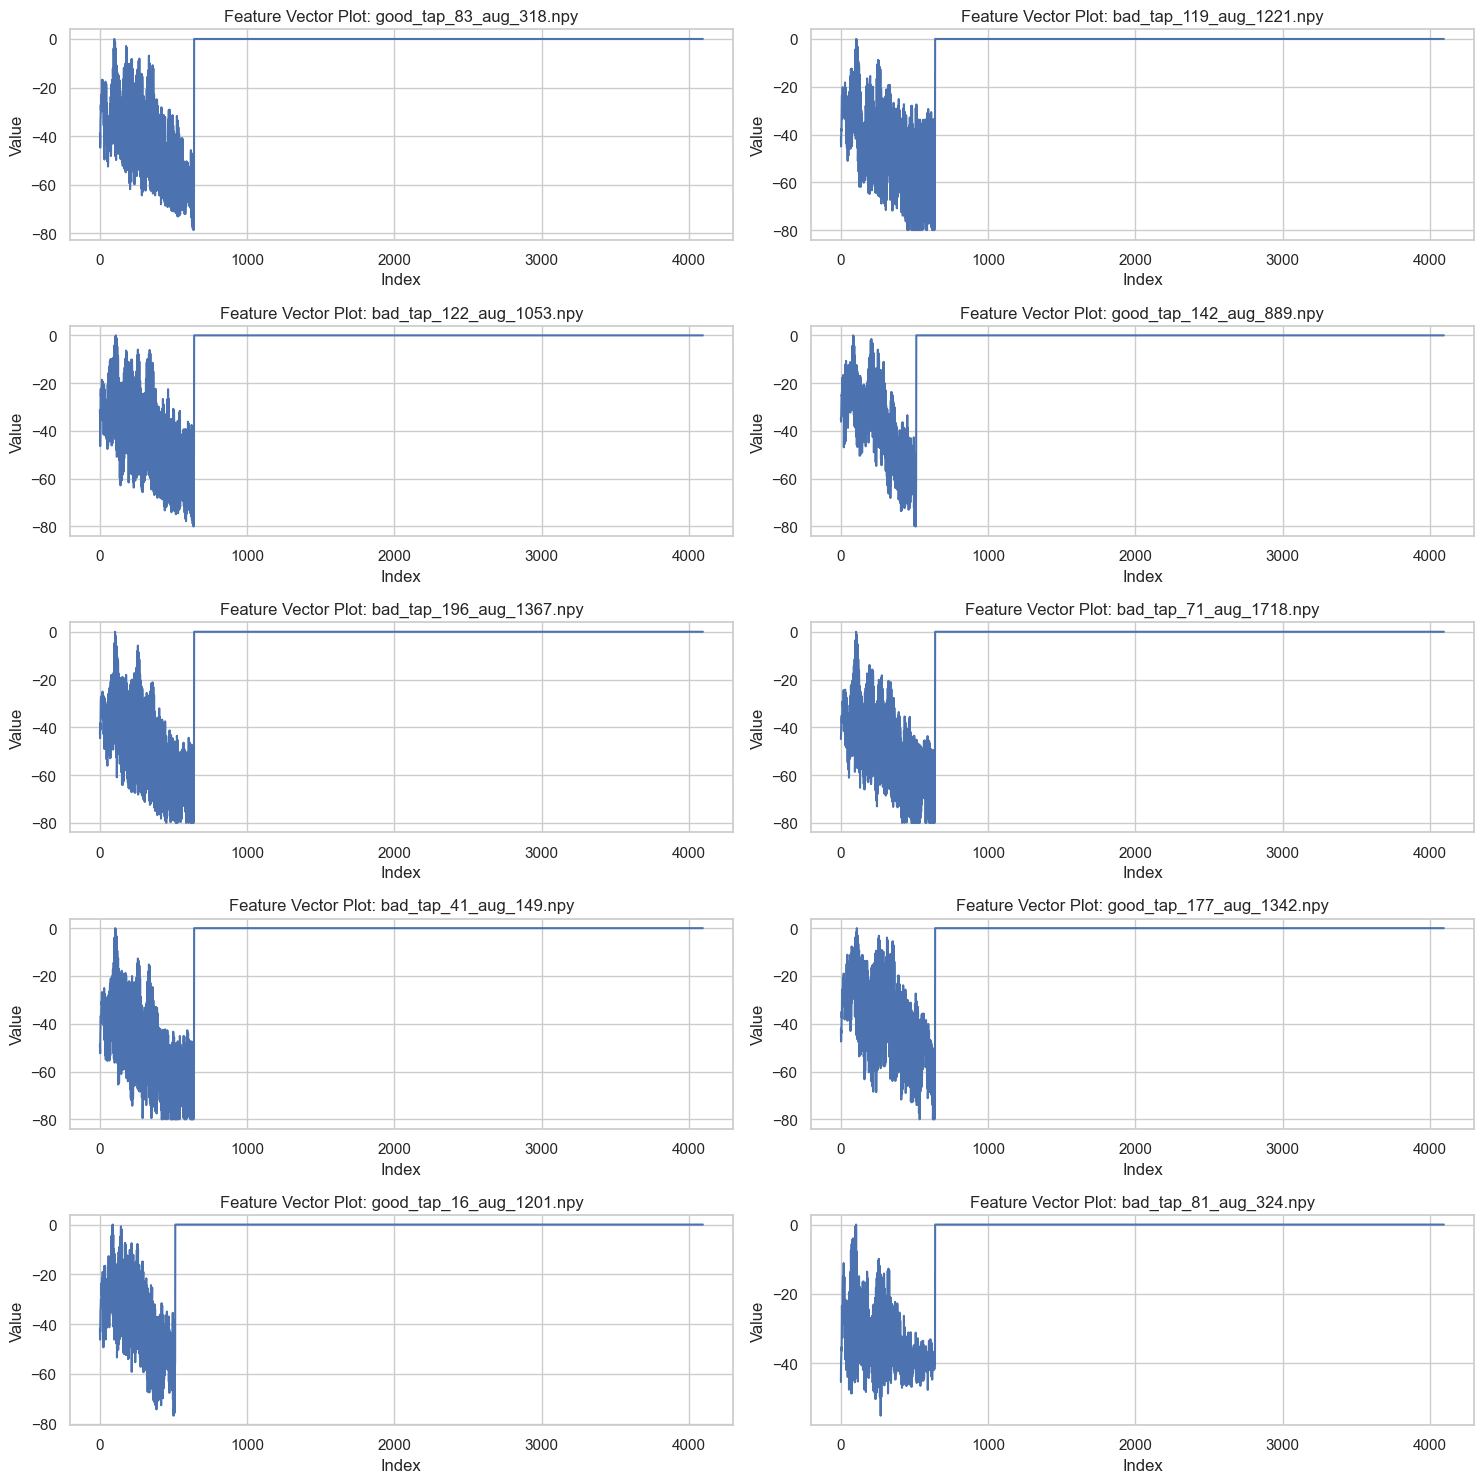

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Directory path
test_clients_dir = "../../resources/material/train-data/federated/non-IID-npy/test_clients"

# List all .npy files and pick 10 randomly
npy_files = [f for f in os.listdir(test_clients_dir) if f.endswith(".npy")]
random_files = np.random.choice(npy_files, size=10, replace=False)

# Plot
plt.figure(figsize=(15, 15))
for idx, file in enumerate(random_files):
    data = np.load(os.path.join(test_clients_dir, file))
    plt.subplot(5, 2, idx + 1)
    plt.plot(data)
    plt.title(f"Feature Vector Plot: {file}")
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.grid(True)

plt.tight_layout()
plt.show()
